# Julia Set

For a complex number $c$, the filled-in Julia set($J_c$) of $c$ is the set of all $z$ for which the iteration $z_{n+1} = z_{n}^2 + c$ does not diverge to infinity. The Julia set is the boundary of the filled-in Julia set. For almost all $c$, these sets are fractals.

# Mandelbrot Set

The Mandelbrot set is the set of all c for which the iteration $z_{n+1} = z_{n}^2 + c$, starting from $z = 0$, does not diverge to infinity.

---

Julia sets are either connected (one piece) or a dust of infinitely many points. The Mandelbrot set is those c for which the Julia set is connected.

Values of c that lie within the Mandelbrot set result in connected Julia sets values of c from outside result in disconnected Julia sets. The Mandelbrot set is given by the boundary between connected and non-connected Julia sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.cm as cm
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")

### Evaluating evolution graphs for random $z_0$ values with $c$ being equal to $0$

In [2]:
def equation(z, c):
  return z**2 + c

def plot_evolution(ax, N, z0, c=0):
  z = np.zeros(N, dtype=complex)
  z[0] = z0

  for n in range(1, N):
      z[n] = equation(z[n-1], c)

  ax.set_title(f'$z_0 = {z[0]}$ and $c = {c} $', fontsize=12)
  ax.set_xlabel('n', fontsize=12)
  ax.set_ylabel('$z_n$', fontsize=12)
  ax.plot(z.real,'.-', label='Re(z)')
  ax.plot(z.imag,'.-', label='Im(z)')
  ax.legend()

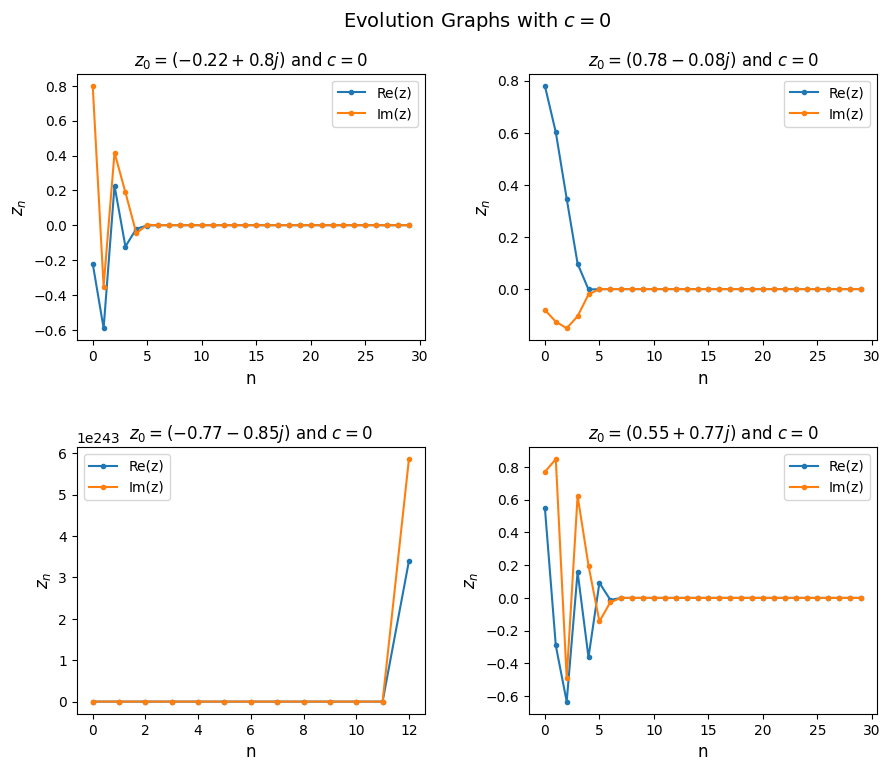

In [3]:
import random

fig, axs = plt.subplots(2,2, figsize=(10, 8))
fig.suptitle('Evolution Graphs with $c = 0$', fontsize=14)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.4)

for i in range(2):
  for j in range(2):
    x = round(random.uniform(-1,1), 2)
    y = round(random.uniform(-1,1), 2)
    z0 = complex(x, y)

    plot_evolution(axs[i][j], 30, z0)

### Trying black & white and different color maps to visualize bifurcation points

In [4]:
import matplotlib.patches as mpatches

def julia(z, c, r, max_iter=100):
  """
  In:
    float z: z_0
    float c: c
    int max_iter: the number of iterations by which the convergence is considered
  """
  i = 0

  for i in range(max_iter):
    if abs(z) < r:
      z = z**2 + c
    else:
      break

  return i

def plot_julia_set(ax, c, cm='Greys', max_iter=100, r = 1.5, density=800):
  re = np.linspace(-r, r, density)
  im = np.linspace(-r, r, density)

  X = np.empty((re.size, im.size), dtype=np.uint32)

  for i in range(re.size):
    for j in range(im.size):
      X[i, j] = julia(complex(re[i], im[j]), c, r, max_iter)

  ax.set_title(f'$c = {c}$', fontsize=11)
  ax.set_xlabel('$Re(z)$', fontsize=10)
  ax.set_ylabel('$Im(z)$', fontsize=10)
  ax.set_xticks(np.arange(-r, 2*r, r))
  ax.set_yticks(np.arange(-r, 2*r, r))
  patch = mpatches.Patch(label=f'cm={cm}', color='black')
  ax.legend(handles=[patch], fontsize=6)

  ax.imshow(X.T, cmap=cm, extent =(-r, r, -r, r))

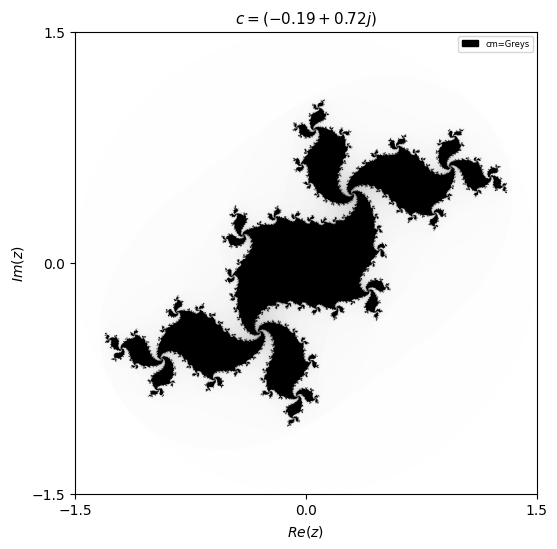

In [10]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()

x = round(random.uniform(-1,1), 2)
y = round(random.uniform(-1,1), 2)
c = complex(x, y)
plot_julia_set(ax, c)

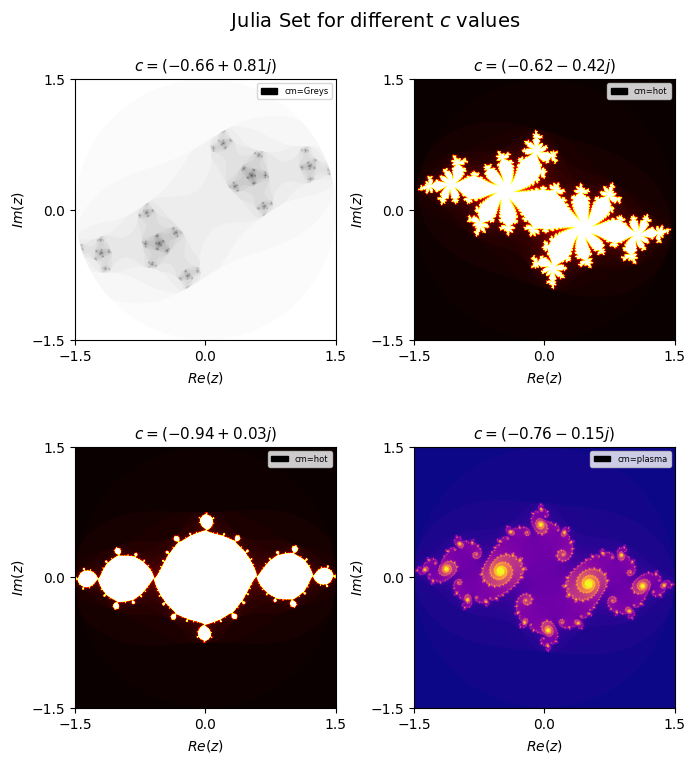

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

fig.suptitle('Julia Set for different $c$ values', fontsize=14)
plt.subplots_adjust(left=0.2,
                    bottom=0.1,
                    right=0.8,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.35)

color_maps = ('Greys', 'hot', 'plasma')

for i in range(2):
  for j in range(2):
    x = round(random.uniform(-1,1), 2)
    y = round(random.uniform(-1,1), 2)
    c = complex(x, y)
    plot_julia_set(axs[i][j], c, color_maps[i+j])


### Generating figure of Julia set with $c = 1-r$ where $r = \frac{1 + \sqrt5}{2}$ is the golden ratio.

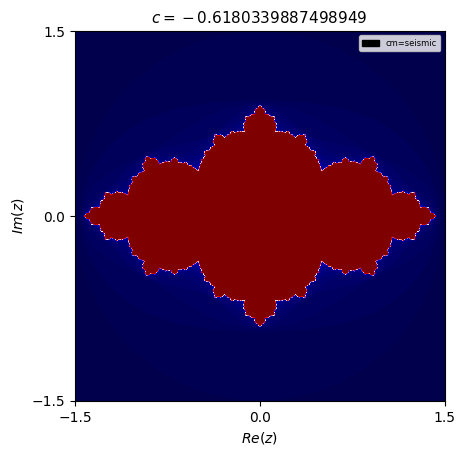

In [6]:
ax = plt.subplot()
r = (1 + np.sqrt(5))/2
c = 1 - r
plot_julia_set(ax, c, 'seismic')

### Plotting figures for $c= e^{ia}$, where $a ∈ [0..2π]$ and writing down axes like in the previous graphs, creating animation of these figures slowly changing $a$

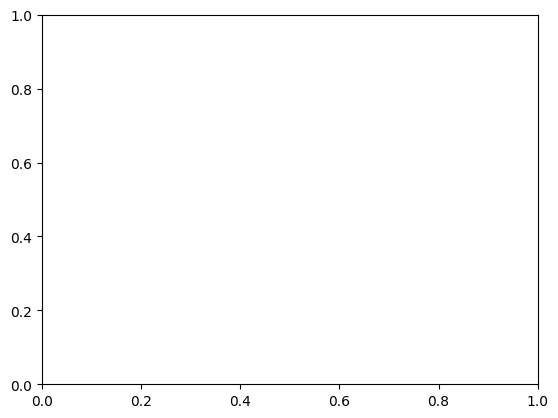

In [10]:
from matplotlib import rc
rc('animation', html='jshtml')

fig = plt.figure(figsize=(6, 4))
ax = plt.axes()

def animate(i):
  plt.cla()
  plot_julia_set(ax, np.exp(i*1j), 'seismic')

anim = FuncAnimation(fig, animate, frames=np.linspace(0, 2 * np.pi, 100), interval=20)
anim.save('julia.gif')

plt.close()

anim